In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16


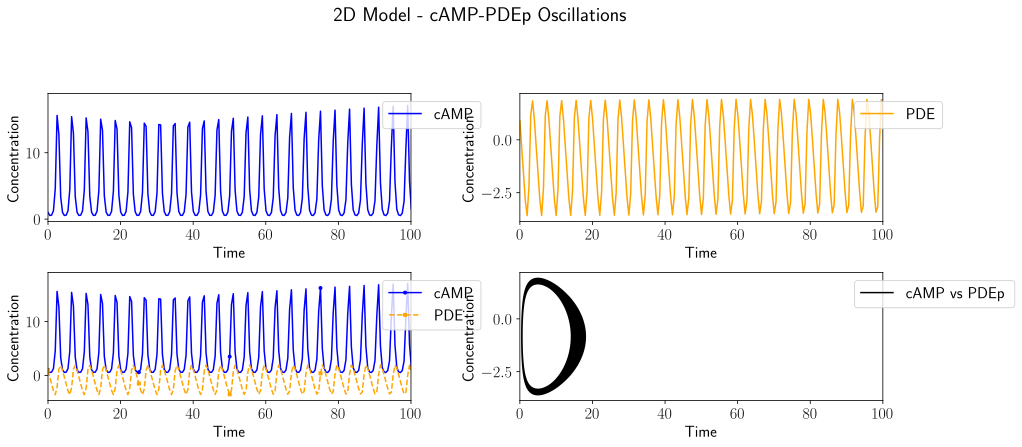

In [18]:
def cAMP_PDEp_ACp(t, x):
    cAMP = x[0]
    PDE = x[1]
    PDEp = x[2]

    ACp = (2*r1*cAMP*K2)/(r2*Dt*(1 + K1/ACt) + r1*cAMP*(1 + K2/ACt) + np.sqrt((r2*Dt*(1 + K1/ACt) + r1*cAMP*(1 + K2/ACt))**2 + 4*(r1*cAMP - r2*Dt)**2))

    dPDE  = r2*Dt *PDEp/(K2+PDEp) - r1*cAMP*PDE /(K1+PDE ) + 0*q1 - 0*q2*PDE
    dPDEp = r1*cAMP*PDE /(K1+PDE ) - r2*Dt *PDEp/(K2+PDEp) + 0*q1 - 0*q2*PDEp

    dcAMP = (k0+k1*ACp) - (k3+k4*PDEp)*cAMP

    return [dcAMP, dPDE, dPDEp]
frq = 1 # Adjusting oscillation
k0 = 0
k1, k3, k4 = 0.59, 0.87, 1.04
r1, r2, r3, r4 = 0.59, 1.02, 2, 10
K1, K2, K3, K4 = 0, 0, 0.001, 1.0
Dt, Et, ACt =  2.87, 0.28, 8.27
#Dt = 0.15
q1, q2 = 0*frq*0.002, 0*frq*0.01
K0 = 5



init_conditions = {'dcAMP': 1, 'dPDE': 0.33, 'dPDEp': 0.91}
x0 = list(init_conditions.values())

solver = solve_ivp(cAMP_PDEp_ACp, [0, 1000], x0, t_eval=np.linspace(0, 500, 1000), method='RK45', atol=1e-8, rtol=1e-8)

cAMP, PDE, PDEp = solver.y
# Create a figure with multiple axes

# Create a figure with multiple axes
fig = plt.figure(figsize=(16, 12))
fig.suptitle("2D Model - cAMP-PDEp Oscillations", fontsize=20)
fig.xlim = (0, 100)

gs = GridSpec(4, 2, figure=fig)
legend_position = {'bbox_to_anchor': (0.9, 1), 'loc': 'upper left'}

# First row
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(solver.t, cAMP, label='cAMP', color='blue')
ax0.set_xlabel('Time')
ax0.set_ylabel('Concentration')
ax0.set_xlim(0, 100)
ax0.legend(**legend_position, fontsize=16)

ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(solver.t, PDEp, label='PDE', color='orange')
ax1.set_xlabel('Time')
ax1.set_ylabel('Concentration')
ax1.set_xlim(0, 100)
ax1.legend(**legend_position, fontsize=16)

# Second row
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(solver.t, cAMP, label='cAMP', color='blue',linestyle='-', marker='o', markersize=3, markevery=50)
ax2.plot(solver.t, PDEp, label='PDE', color='orange', linestyle='--', marker='s', markersize=3, markevery=50)
ax2.set_xlabel('Time')
ax2.set_ylabel('Concentration')
ax2.set_xlim(0, 100)
ax2.legend(**legend_position, fontsize=16)

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(cAMP, PDEp, label='cAMP vs PDEp', color='black')
ax3.set_xlabel('Time')
ax3.set_ylabel('Concentration')
ax3.set_xlim(0, 100)
ax3.legend(**legend_position, fontsize=16)


# Adjust the layout and show the plot
fig.subplots_adjust(wspace=0.3, hspace=0.4, right=0.85)
fig.savefig('cAMP_PDEp.png', dpi=300, bbox_inches='tight')
plt.show()

# Third row (centered 3D plot)
#ax4 = fig.add_subplot(gs[2, :], projection='3d')
#ax4.plot(cAMP, PDEp, ACp, label='cAMP-PDEp-ACp', color='green')
#ax4.set_xlabel('cAMP')
#ax4.set_ylabel('PDEp')
#ax4.set_zlabel('ACp')
#ax4.legend(**legend_position, fontsize=16)

# Adjust the spacing between the axes
#fig.subplots_adjust(wspace=0.3, hspace=0.4, right=0.85)
#fig.savefig('cAMP_PDEp_ACp.png', dpi=300, bbox_inches='tight')
# Show the plots

# Show the plots